In [33]:
lung_onda = 650e-09
L = 0.99

def findMin(findNmin,xdata,Idata,bfit):
  period = lung_onda*L/bfit
  minimum = np.ones(findNmin*2)*10
  minimumIndex = np.zeros(findNmin*2)

  for t in range(findNmin):
    for i in range(len(xdata)):
      if(xdata[i]<9/8*period*(t+1) and xdata[i]>7/8*period*(t+1)):
        if(Idata[i]<minimum[t]):
          minimum[t]=Idata[i]
          minimumIndex[t] = i
      if(-xdata[i]<9/8*period*(t+1) and -xdata[i]>7/8*period*(t+1)):
        if(Idata[i]<minimum[t+findNmin]):
          minimum[t+findNmin]=Idata[i]
          minimumIndex[t+findNmin] = i

  minimumIndexReturn = []
  for i in range(len(minimumIndex)):
    minimumIndexReturn.append(int(minimumIndex[i]))
  return minimumIndexReturn

def findMax(findNmax,xdata,Idata,bfit):
  period = lung_onda*L/bfit
  maximum = np.ones(findNmax*2)*-10
  maximumIndex = np.zeros(findNmax*2)

  for t in range(findNmax):
    for i in range(len(xdata)):
      if(xdata[i]<2*period*(t+1) and xdata[i]>period*(t+1)):
        if(Idata[i]>maximum[t]):
          maximum[t]=Idata[i]
          maximumIndex[t] = i
      if(-xdata[i]<2*period*(t+1) and -xdata[i]>period*(t+1)):
        if(Idata[i]>maximum[t+findNmax]):
          maximum[t+findNmax]=Idata[i]
          maximumIndex[t+findNmax] = i

  maximumIndexReturn = []
  for i in range(len(maximumIndex)):
    maximumIndexReturn.append(int(maximumIndex[i]))
  return maximumIndexReturn

maxIntens
36.909292
maxIntens2
37.448062
maxIntens3
37.052262
maxIntens4
20.575672
b
0.00016
bfit
[0.00016454]
[1.12055467e-06]
5e-06
Intensityfit
36.909292
0.3
bfit2
[0.00016081]
[1.34163613e-06]
4.000000000000001e-06
Intensityfit2
37.448062
0.3
bfit3
[0.00016082]
[3.31157427e-07]
7e-06
Intensityfit3
37.052262
0.6
bfit4
[0.00016514]
[4.03327723e-07]
1e-05
Intensityfit4
20.575672
0.3
bestbtot1234
8e-05
1.0000000000000002e-06
bestbtot123
7.900000000000001e-05
3e-06
bestIntensity123
16.5
0.1
lung_onda da minimo1
[6.47452569e-07]
[2.12402836e-08]
lung_onda da minimo2
[6.42591065e-07]
[1.99403519e-08]
lung_onda da minimo3
[6.54599394e-07]
[2.00792766e-08]
set 2 lung_onda da minimo1
[6.50487702e-07]
[1.79725362e-08]
set 2 lung_onda da minimo2
[6.48051115e-07]
[1.6596851e-08]
set 2 lung_onda da minimo3
[6.55252585e-07]
[1.651751e-08]
set 3 lung_onda da minimo1
[6.50409306e-07]
[2.93725319e-08]
set 3 lung_onda da minimo2
[6.27992602e-07]
[2.76192448e-08]
set 3 lung_onda da minimo3
[6.37630701

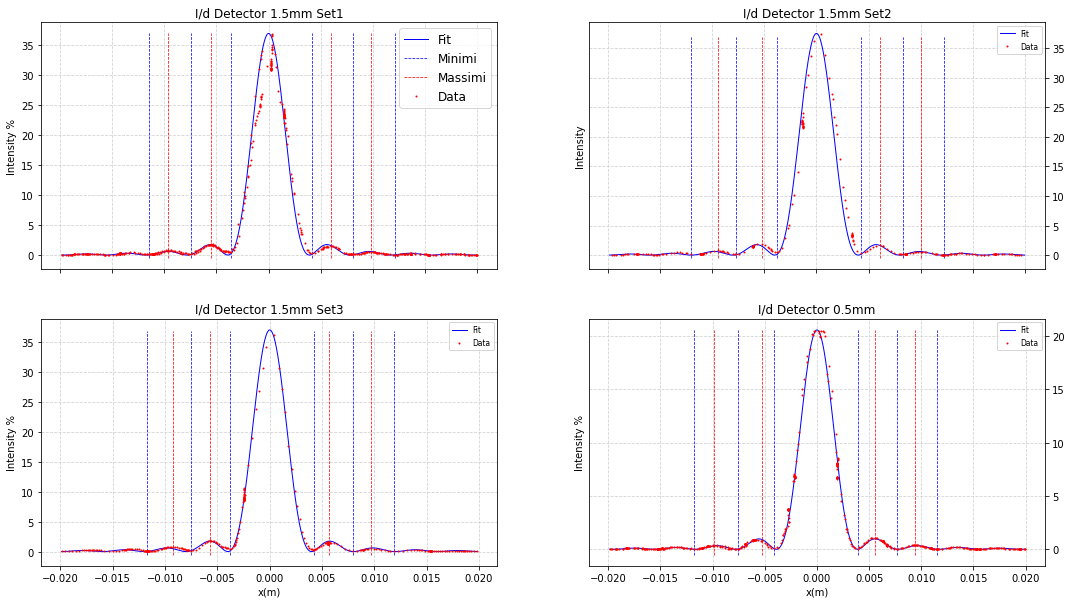

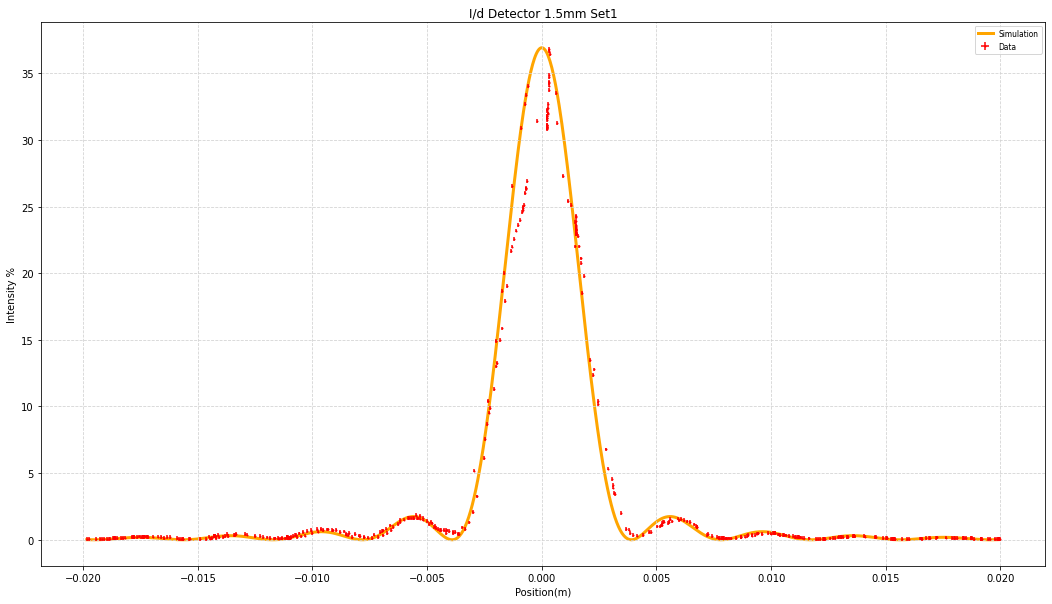

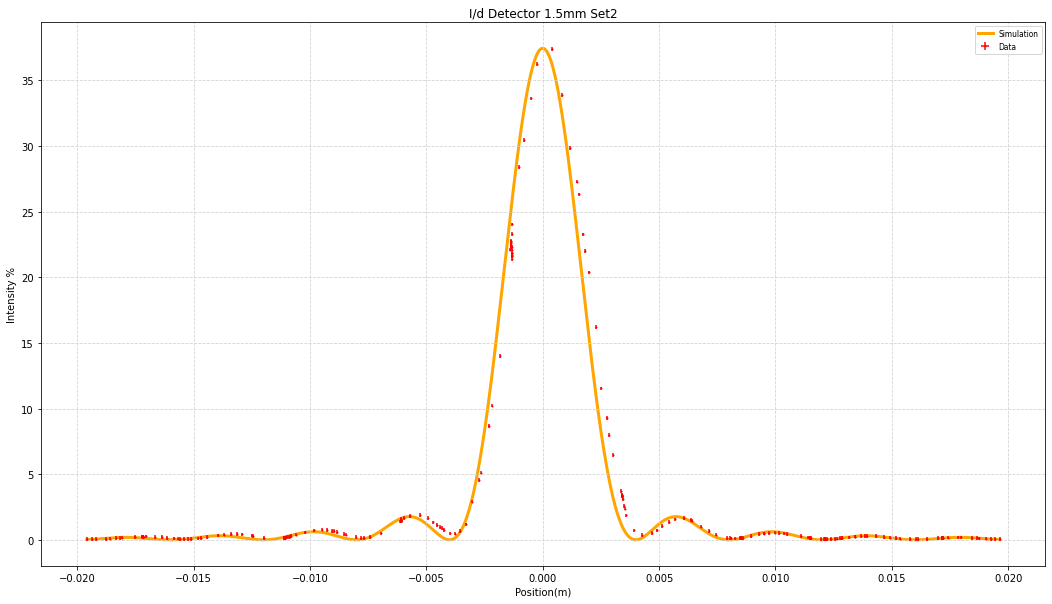

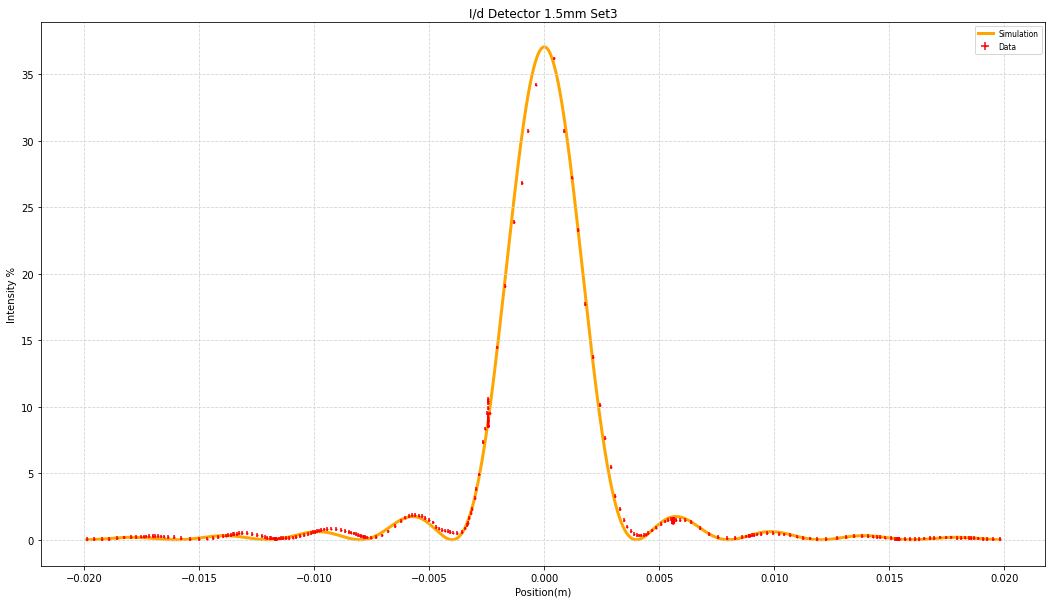

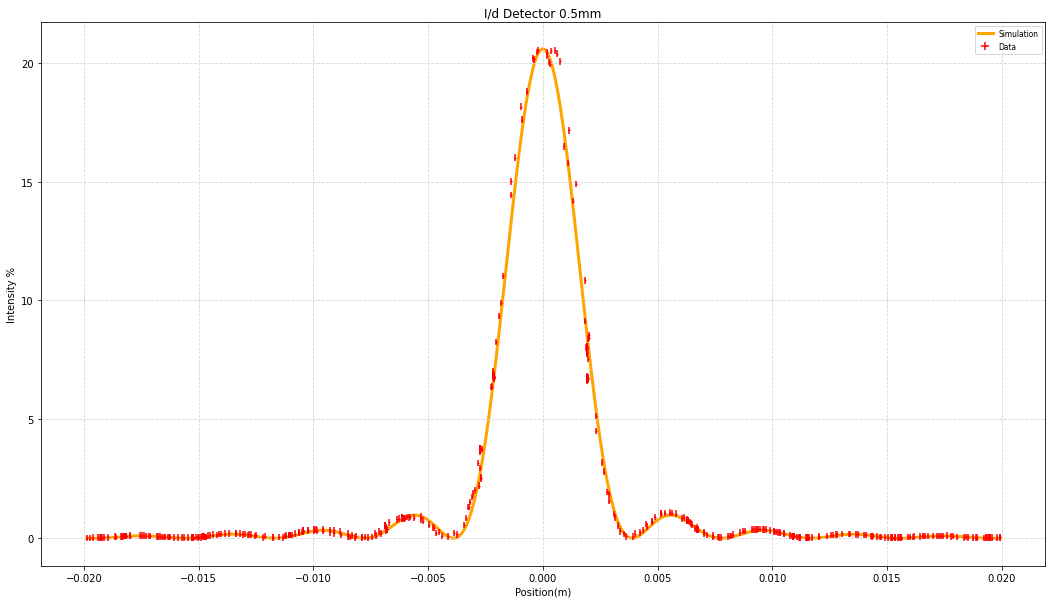

In [82]:
b = 0.16e-03

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


Table = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Antonio_0.16_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table = Table.transpose()

Table2 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessio_0.16_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table2 = Table2.transpose()

Table3 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessandra_0.16_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table3 = Table3.transpose()

Table4 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessio_0.16_0.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table4 = Table4.transpose()

Idata = Table[0]-0.013578
xdata = Table[1]

Idata2 = Table2[0]-0.013578
xdata2 = Table2[1]

Idata3 = Table3[0]-0.013578
xdata3 = Table3[1]

Idata4 = Table4[0]-0.013578
xdata4 = Table4[1]

minx = np.argmin(xdata2)
xdata1 = []
Idata1 = []
for i in range(len(xdata2)):
  if(i<minx):
    xdata1.append(xdata2[i])
    Idata1.append(Idata2[i])
Idata2 = Idata1
xdata2 = xdata1

minx = np.argmin(xdata3)
xdata1 = []
Idata1 = []
for i in range(len(xdata3)):
  if(i>minx):
    xdata1.append(xdata3[i])
    Idata1.append(Idata3[i])

Idata3 = Idata1
xdata3 = xdata1



maxint = np.argmax(Idata)
xdata = (xdata-xdata[maxint])

maxint = np.argmax(Idata2)
xdata2 = (xdata2-xdata2[maxint])

maxint = np.argmax(Idata3)
xdata3 = (xdata3-xdata3[maxint])

maxint = np.argmax(Idata4)
xdata4 = (xdata4-xdata4[maxint])

#taglio a dx e sx 

xdata1 = []
Idata1 = []
for i in range(len(xdata)):
  if(np.abs(xdata[i])<0.02):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])

Idata = Idata1
xdata = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata2)):
  if(np.abs(xdata2[i])<0.02):
    xdata1.append(xdata2[i])
    Idata1.append(Idata2[i])

Idata2 = Idata1
xdata2 = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata3)):
  if(np.abs(xdata3[i])<0.02):
    xdata1.append(xdata3[i])
    Idata1.append(Idata3[i])

Idata3 = Idata1
xdata3 = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata4)):
  if(np.abs(xdata4[i])<0.02):
    xdata1.append(xdata4[i])
    Idata1.append(Idata4[i])

Idata4 = Idata1
xdata4 = xdata1

MaxIntensity = np.max(Idata)
print('maxIntens')
print(MaxIntensity)

MaxIntensity2 = np.max(Idata2)
print('maxIntens2')
print(MaxIntensity2)

MaxIntensity3 = np.max(Idata3)
print('maxIntens3')
print(MaxIntensity3)

MaxIntensity4 = np.max(Idata4)
print('maxIntens4')
print(MaxIntensity4)

xdataerr = np.ones(len(xdata))*8e-6
Idataerr = np.ones(len(xdata))*(4.59/100*3)

xdataerr2 = np.ones(len(xdata2))*8e-6
Idataerr2 = np.ones(len(xdata2))*(4.59/100*3)

xdataerr3 = np.ones(len(xdata3))*8e-6
Idataerr3 = np.ones(len(xdata3))*(4.59/100*3)

xdataerr4 = np.ones(len(xdata4))*8e-6
Idataerr4 = np.ones(len(xdata4))*(4.59/100*3)


def distanceFunctionFit(x,b):
  return (MaxIntensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit2(x,b):
  return (MaxIntensity2*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit3(x,b):
  return (MaxIntensity3*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit4(x,b):
  return (MaxIntensity4*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit5(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

#simulation

#tolgo gli zeri

xdata1 = []
Idata1 = []
Idataerr1 = []
xdataerr1 = []
for i in range(len(Idata)):
  if(xdata[i] != 0):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])
    Idataerr1.append(Idataerr[i])
    xdataerr1.append(xdataerr[i])

xdata12 = []
Idata12 = []
Idataerr12 = []
xdataerr12 = []
for i in range(len(Idata2)):
  if(xdata2[i] != 0):
    xdata12.append(xdata2[i])
    Idata12.append(Idata2[i])
    Idataerr12.append(Idataerr2[i])
    xdataerr12.append(xdataerr2[i])

xdata13 = []
Idata13 = []
Idataerr13 = []
xdataerr13 = []
for i in range(len(xdata3)):
  if(xdata3[i] != 0):
    xdata13.append(xdata3[i])
    Idata13.append(Idata3[i])
    Idataerr13.append(Idataerr3[i])
    xdataerr13.append(xdataerr3[i])

xdata14 = []
Idata14 = []
Idataerr14 = []
xdataerr14 = []
for i in range(len(xdata4)):
  if(xdata4[i] != 0):
    xdata14.append(xdata4[i])
    Idata14.append(Idata4[i])
    Idataerr14.append(Idataerr4[i])
    xdataerr14.append(xdataerr4[i])


#fitting distance from measured intensity
print("b")
print(b)
#set1
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata1, Idata1,sigma = Idataerr1,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit = popt
print("bfit")
print(bfit)
print(bfiterr)
print(0.5*10**(-5))
print('Intensityfit')
print(MaxIntensity)
print(0.3)
xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfitb,bfit)
x = np.linspace(min(xdata),max(xdata),1000)
y = distanceFunctionFit(x,bfit)
#set2
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit2, xdata12, Idata12,sigma = Idataerr12,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit2 = popt
print("bfit2")

print(bfit2)
print(bfiterr)
print(0.4*10**(-5))
print('Intensityfit2')
print(MaxIntensity2)
print(0.3)
xfitb2 = np.linspace(min(xdata), max(xdata), 1000)
yfitb2 = distanceFunctionFit2(xfitb2,bfit2)
x2 = np.linspace(min(xdata2),max(xdata2),1000)
y2 = distanceFunctionFit2(x2,bfit2)


guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit3, xdata13, Idata13,sigma = Idataerr13,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit3 = popt
print("bfit3")

print(bfit3)
print(bfiterr)
print(0.7*10**(-5))
print('Intensityfit3')
print(MaxIntensity3)
print(0.6)
xfitb3 = np.linspace(min(xdata3), max(xdata3), 1000)
yfitb3 = distanceFunctionFit3(xfitb3,bfit3)
x3 = np.linspace(min(xdata3),max(xdata3),1000)
y3 = distanceFunctionFit3(x3,bfit3)


#set3
#set4
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit4, xdata14, Idata14,sigma = Idataerr14,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit4 = popt
print("bfit4")

print(bfit4)
print(bfiterr)
print(1*10**(-5))
print('Intensityfit4')
print(MaxIntensity4)
print(0.3)
xfitb4 = np.linspace(min(xdata4), max(xdata4), 1000)
yfitb4 = distanceFunctionFit4(xfitb4,bfit4)
x4 = np.linspace(min(xdata4),max(xdata4),1000)
y4 = distanceFunctionFit4(x4,bfit4)

print('bestbtot1234')
print(8*10**(-5))
print(0.1*10**(-5))
print('bestbtot123')
print(7.9*10**(-5))
print(0.3*10**(-5))
print('bestIntensity123')
print(16.5)
print(0.1)

xtot = np.linspace(min(xdata4),max(xdata4),1000)
ytot = distanceFunctionFit5(x4,16.2*10**(-5),37.15)


#graph
yint = np.linspace(-0.5,max(Idata),1000)
yint4 = np.linspace(-0.5,max(Idata4),1000)

minimumdata = findMin(3,xdata1,Idata1,bfit)
minimumdata2 = findMin(3,xdata12,Idata12,bfit2)
minimumdata3 = findMin(3,xdata13,Idata13,bfit3)
minimumdata4 = findMin(3,xdata14,Idata14,bfit4)

maximumdata = findMax(2,xdata1,Idata1,bfit)
maximumdata2 = findMax(2,xdata12,Idata12,bfit2)
maximumdata3 = findMax(2,xdata13,Idata13,bfit3)
maximumdata4 = findMax(2,xdata14,Idata14,bfit4)

fig, axs = plt.subplots(2, 2,figsize=(18,10))
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm Set1')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].legend(loc="upper right",prop={'size': 12})
print('lung_onda da minimo1')
mindiff = np.abs(xdata1[minimumdata[0]]-xdata1[minimumdata[3]])/2
print(bfit/L*mindiff)
print(((0.5*10**(-5)/bfit)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit/L*mindiff)
print('lung_onda da minimo2')
mindiff = np.abs(xdata1[minimumdata[1]]-xdata1[minimumdata[4]])/2
print(bfit/L*mindiff/2)
print(((0.5*10**(-5)/bfit)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit/L*mindiff/2)
print('lung_onda da minimo3')
mindiff = np.abs(xdata1[minimumdata[2]]-xdata1[minimumdata[5]])/2
print(bfit/L*mindiff/3)
print(((0.5*10**(-5)/bfit)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit/L*mindiff/3)


axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 1].plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm Set2')
axs[0, 1].legend(loc="upper right",prop={'size': 7.5})
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
print('set 2 lung_onda da minimo1')
mindiff = np.abs(xdata12[minimumdata2[0]]-xdata12[minimumdata2[3]])/2
print(bfit2/L*mindiff)
print(((0.4*10**(-5)/bfit2)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit2/L*mindiff)
print('set 2 lung_onda da minimo2')
mindiff = np.abs(xdata12[minimumdata2[1]]-xdata12[minimumdata2[4]])/2
print(bfit2/L*mindiff/2)
print(((0.4*10**(-5)/bfit2)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit2/L*mindiff/2)
print('set 2 lung_onda da minimo3')
mindiff = np.abs(xdata12[minimumdata2[2]]-xdata12[minimumdata2[5]])/2
print(bfit2/L*mindiff/3)
print(((0.4*10**(-5)/bfit2)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit2/L*mindiff/3)

axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 0].plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm Set3')
axs[1, 0].legend(loc="upper right",prop={'size': 7.5})
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
print('set 3 lung_onda da minimo1')
mindiff = np.abs(xdata13[minimumdata3[0]]-xdata13[minimumdata3[3]])/2
print(bfit3/L*mindiff)
print(((0.7*10**(-5)/bfit3)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit3/L*mindiff)
print('set 3 lung_onda da minimo2')
mindiff = np.abs(xdata13[minimumdata3[1]]-xdata13[minimumdata3[4]])/2
print(bfit3/L*mindiff/2)
print(((0.7*10**(-5)/bfit3)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit3/L*mindiff/2)
print('set 3 lung_onda da minimo3')
mindiff = np.abs(xdata13[minimumdata3[2]]-xdata13[minimumdata3[5]])/2
print(bfit3/L*mindiff/3)
print(((0.7*10**(-5)/bfit3)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit3/L*mindiff/3)

axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 1].plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
axs[1, 1].set_title('I/d Detector 0.5mm')
axs[1, 1].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].yaxis.tick_right()
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[0]],yint4, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[1]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[2]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[3]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[4]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[5]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[0]],yint4, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[1]],yint4, color='red', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[2]],yint4, color='red', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[3]],yint4, color='red', linewidth=0.75, linestyle='dashed')
print('set 4 lung_onda da minimo1')
mindiff = np.abs(xdata14[minimumdata4[0]]-xdata14[minimumdata4[3]])/2
print(bfit4/L*mindiff)
print(((1*10**(-5)/bfit4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit4/L*mindiff)
print('set 4 lung_onda da minimo2')
mindiff = np.abs(xdata14[minimumdata4[1]]-xdata14[minimumdata4[4]])/2
print(bfit4/L*mindiff/2)
print(((1*10**(-5)/bfit4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit4/L*mindiff/2)
print('set 4 lung_onda da minimo3')
mindiff = np.abs(xdata14[minimumdata4[2]]-xdata14[minimumdata4[5]])/2
print(bfit4/L*mindiff/3)
print(((1*10**(-5)/bfit4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit4/L*mindiff/3)


print('lung_onda finale per 0.16')
print(6.45*10**(-7))
print(0.15*10**(-7))

for ax in axs.flat:
    ax.set(xlabel='x(m)', ylabel='Intensity %')
axs[0, 0].label_outer()
axs[0, 1].label_outer()
axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Intensity')
plt.show()
fig.savefig(f'4Grafici_0.16.pdf',dpi = 300)







fig = plt.figure(figsize=(18,10))
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
#plt.plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata1,Idata1, xerr=xdataerr1,yerr=Idataerr1,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set1')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.16_1.5_set1.pdf',dpi = 300)

fig = plt.figure(figsize=(18,10))
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
#plt.plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata12,Idata12, xerr=xdataerr12,yerr=Idataerr12,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set2')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.16_1.5_set2.pdf',dpi = 300)

fig = plt.figure(figsize=(18,10))
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
#plt.plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata13,Idata13, xerr=xdataerr13,yerr=Idataerr13,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set3')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.16_1.5_set3.pdf',dpi = 300)


fig = plt.figure(figsize=(18,10))
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
#plt.plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata14,Idata14, xerr=xdataerr14,yerr=Idataerr14,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 0.5mm')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.16_0.5.pdf',dpi = 300)


xdata0161 = xdata1
Idata0161 = Idata1

xdata0162 = xdata12
Idata0162 = Idata12

xdata0163 = xdata13
Idata0163 = Idata13

xdata0164 = xdata14
Idata0164 = Idata14

maxIntens
16.546742000000002
maxIntens2
17.120012000000003
maxIntens3
16.944282
maxIntens4
4.888492
b
8e-05
bfit
7.823687702855324e-05
1.6518238863225205e-07
5e-06
Intensityfit
16.320743558599617
0.031519772865564503
0.6
bfit2
8.03430419375947e-05
1.1168881596691965e-07
4.000000000000001e-06
Intensityfit2
16.803772600297123
0.02412480040090466
0.6
bfit3
7.955473438343476e-05
9.929437490376088e-08
4.000000000000001e-06
Intensityfit3
16.668474220342304
0.019020688558313036
0.6
bfit4
8.3615852065662e-05
3.542377097154702e-07
5e-06
Intensityfit4
4.7616737252269505
0.018599590102597555
0.3
bestbtot1234
8e-05
1.0000000000000002e-06
bestbtot123
7.900000000000001e-05
3e-06
bestIntensity123
16.5
0.1
lung_onda da minimo1
6.32098647386751e-07
4.057919621821019e-08
lung_onda da minimo2
6.145546204167113e-07
3.932592139849957e-08
lung_onda da minimo3
6.188484288192887e-07
3.957480777839858e-08
set 2 lung_onda da minimo1
6.586912120065528e-07
3.303118894530947e-08
set 2 lung_onda da minimo2
6.403096

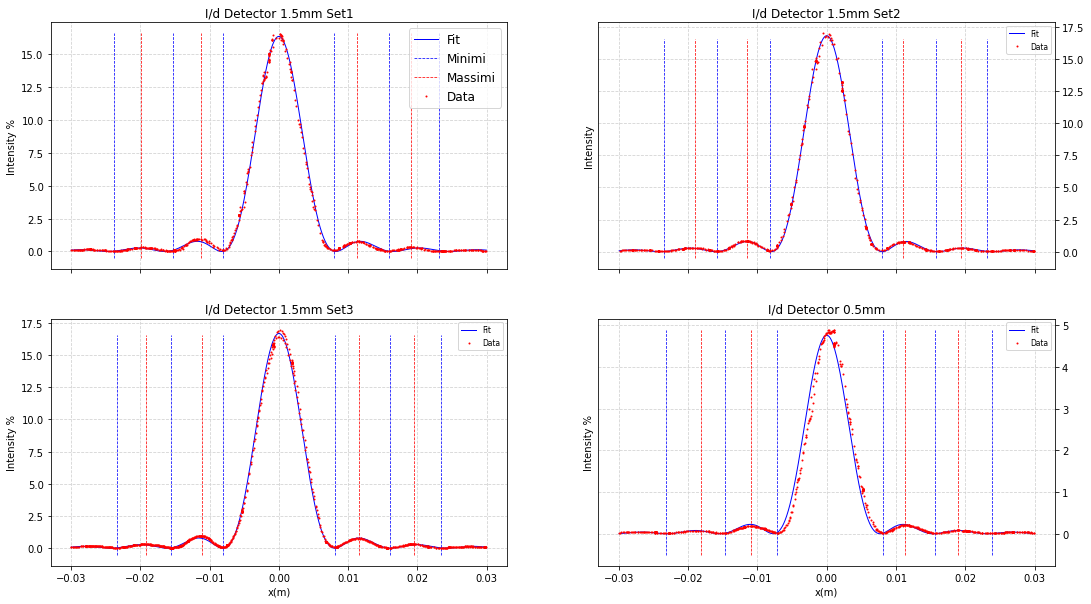

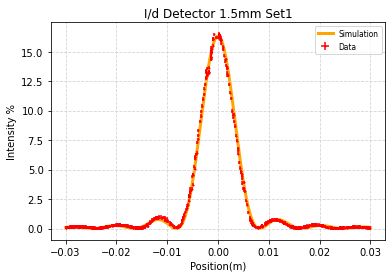

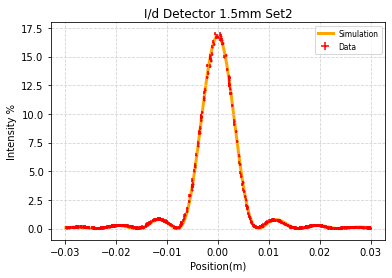

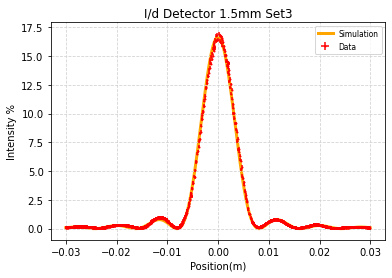

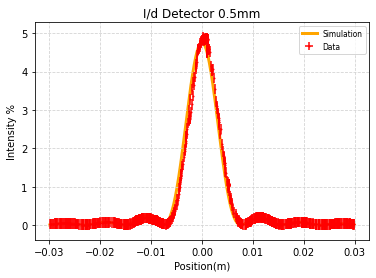

In [81]:
b = 0.08e-03

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


Table = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Antonio_0.08_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table = Table.transpose()

Table2 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessio_0.08_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table2 = Table2.transpose()

Table3 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessandra_0.08_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table3 = Table3.transpose()

Table4 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Antonio_0.08_0.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table4 = Table4.transpose()

Idata = Table[0]-0.013578
xdata = Table[1]

Idata2 = Table2[0]-0.013578
xdata2 = Table2[1]

Idata3 = Table3[0]-0.013578
xdata3 = Table3[1]

Idata4 = Table4[0]-0.013578
xdata4 = Table4[1]

maxint = np.argmax(Idata)
xdata = (xdata-xdata[maxint])

maxint = np.argmax(Idata2)
xdata2 = (xdata2-xdata2[maxint])

maxint = np.argmax(Idata3)
xdata3 = (xdata3-xdata3[maxint])

maxint = np.argmax(Idata4)
xdata4 = (xdata4-xdata4[maxint])

#taglio a dx e sx 

xdata1 = []
Idata1 = []
for i in range(len(xdata)):
  if(np.abs(xdata[i])<0.03):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])

Idata = Idata1
xdata = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata2)):
  if(np.abs(xdata2[i])<0.03):
    xdata1.append(xdata2[i])
    Idata1.append(Idata2[i])

Idata2 = Idata1
xdata2 = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata3)):
  if(np.abs(xdata3[i])<0.03):
    xdata1.append(xdata3[i])
    Idata1.append(Idata3[i])

Idata3 = Idata1
xdata3 = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata4)):
  if(np.abs(xdata4[i])<0.03):
    xdata1.append(xdata4[i])
    Idata1.append(Idata4[i])

Idata4 = Idata1
xdata4 = xdata1

MaxIntensity = np.max(Idata)
print('maxIntens')
print(MaxIntensity)

MaxIntensity2 = np.max(Idata2)
print('maxIntens2')
print(MaxIntensity2)

MaxIntensity3 = np.max(Idata3)
print('maxIntens3')
print(MaxIntensity3)

MaxIntensity4 = np.max(Idata4)
print('maxIntens4')
print(MaxIntensity4)

xdataerr = np.ones(len(xdata))*8e-6
Idataerr = np.ones(len(xdata))*(4.59/100*3)

xdataerr2 = np.ones(len(xdata2))*8e-6
Idataerr2 = np.ones(len(xdata2))*(4.59/100*3)

xdataerr3 = np.ones(len(xdata3))*8e-6
Idataerr3 = np.ones(len(xdata3))*(4.59/100*3)

xdataerr4 = np.ones(len(xdata4))*8e-6
Idataerr4 = np.ones(len(xdata4))*(4.59/100*3)


def distanceFunctionFit(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit2(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit3(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit4(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

#simulation

#tolgo gli zeri

xdata1 = []
Idata1 = []
Idataerr1 = []
xdataerr1 = []
for i in range(len(Idata)):
  if(xdata[i] != 0):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])
    Idataerr1.append(Idataerr[i])
    xdataerr1.append(xdataerr[i])

xdata12 = []
Idata12 = []
Idataerr12 = []
xdataerr12 = []
for i in range(len(Idata2)):
  if(xdata2[i] != 0):
    xdata12.append(xdata2[i])
    Idata12.append(Idata2[i])
    Idataerr12.append(Idataerr2[i])
    xdataerr12.append(xdataerr2[i])

xdata13 = []
Idata13 = []
Idataerr13 = []
xdataerr13 = []
for i in range(len(xdata3)):
  if(xdata3[i] != 0):
    xdata13.append(xdata3[i])
    Idata13.append(Idata3[i])
    Idataerr13.append(Idataerr3[i])
    xdataerr13.append(xdataerr3[i])

xdata14 = []
Idata14 = []
Idataerr14 = []
xdataerr14 = []
for i in range(len(xdata4)):
  if(xdata4[i] != 0):
    xdata14.append(xdata4[i])
    Idata14.append(Idata4[i])
    Idataerr14.append(Idataerr4[i])
    xdataerr14.append(xdataerr4[i])


#fitting distance from measured intensity
print("b")
print(b)
#set1
guess = np.array([b,MaxIntensity])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata1, Idata1,sigma = Idataerr1,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit")
print(bfit)
print(bfiterr)
print(0.5*10**(-5))
print('Intensityfit')
print(intensity)
print(intensityerr)
print(0.6)
xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfitb,bfit,intensity)
x = np.linspace(min(xdata),max(xdata),1000)
y = distanceFunctionFit(x,bfit,intensity)
#set2
guess = np.array([b,MaxIntensity2])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit2, xdata12, Idata12,sigma = Idataerr12,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit2,intensity = popt
print("bfit2")

print(bfit2)
print(bfiterr)
print(0.4*10**(-5))
print('Intensityfit2')
print(intensity)
print(intensityerr)
print(0.6)
xfitb2 = np.linspace(min(xdata), max(xdata), 1000)
yfitb2 = distanceFunctionFit2(xfitb2,bfit2,intensity)
x2 = np.linspace(min(xdata2),max(xdata2),1000)
y2 = distanceFunctionFit2(x2,bfit2,intensity)


guess = np.array([b,MaxIntensity3])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit3, xdata13, Idata13,sigma = Idataerr13,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit3,intensity = popt
print("bfit3")

print(bfit3)
print(bfiterr)
print(0.4*10**(-5))
print('Intensityfit3')
print(intensity)
print(intensityerr)
print(0.6)
xfitb3 = np.linspace(min(xdata3), max(xdata3), 1000)
yfitb3 = distanceFunctionFit3(xfitb3,bfit3,intensity)
x3 = np.linspace(min(xdata3),max(xdata3),1000)
y3 = distanceFunctionFit3(x3,bfit3,intensity)


#set3
#set4
guess = np.array([b,MaxIntensity4])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit4, xdata14, Idata14,sigma = Idataerr14,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit4,intensity = popt
print("bfit4")

print(bfit4)
print(bfiterr)
print(0.5*10**(-5))
print('Intensityfit4')
print(intensity)
print(intensityerr)
print(0.3)
xfitb4 = np.linspace(min(xdata4), max(xdata4), 1000)
yfitb4 = distanceFunctionFit4(xfitb4,bfit4,intensity)
x4 = np.linspace(min(xdata4),max(xdata4),1000)
y4 = distanceFunctionFit4(x4,bfit4,intensity)

print('bestbtot1234')
print(8*10**(-5))
print(0.1*10**(-5))
print('bestbtot123')
print(7.9*10**(-5))
print(0.3*10**(-5))
print('bestIntensity123')
print(16.5)
print(0.1)

xtot = np.linspace(min(xdata4),max(xdata4),1000)
ytot = distanceFunctionFit4(x4,7.9*10**(-5),16.5)


#graph
yint = np.linspace(-0.5,max(Idata),1000)
yint4 = np.linspace(-0.5,max(Idata4),1000)

minimumdata = findMin(3,xdata1,Idata1,bfit)
minimumdata2 = findMin(3,xdata12,Idata12,bfit2)
minimumdata3 = findMin(3,xdata13,Idata13,bfit3)
minimumdata4 = findMin(3,xdata14,Idata14,bfit4)

maximumdata = findMax(2,xdata1,Idata1,bfit)
maximumdata2 = findMax(2,xdata12,Idata12,bfit2)
maximumdata3 = findMax(2,xdata13,Idata13,bfit3)
maximumdata4 = findMax(2,xdata14,Idata14,bfit4)

fig, axs = plt.subplots(2, 2,figsize=(18,10))
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm Set1')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].legend(loc="upper right",prop={'size': 12})
print('lung_onda da minimo1')
mindiff = np.abs(xdata1[minimumdata[0]]-xdata1[minimumdata[3]])/2
print(bfit/L*mindiff)
print(((0.5*10**(-5)/bfit)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit/L*mindiff)
print('lung_onda da minimo2')
mindiff = np.abs(xdata1[minimumdata[1]]-xdata1[minimumdata[4]])/2
print(bfit/L*mindiff/2)
print(((0.5*10**(-5)/bfit)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit/L*mindiff/2)
print('lung_onda da minimo3')
mindiff = np.abs(xdata1[minimumdata[2]]-xdata1[minimumdata[5]])/2
print(bfit/L*mindiff/3)
print(((0.5*10**(-5)/bfit)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit/L*mindiff/3)


axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 1].plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm Set2')
axs[0, 1].legend(loc="upper right",prop={'size': 7.5})
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
print('set 2 lung_onda da minimo1')
mindiff = np.abs(xdata12[minimumdata2[0]]-xdata12[minimumdata2[3]])/2
print(bfit2/L*mindiff)
print(((0.4*10**(-5)/bfit2)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit2/L*mindiff)
print('set 2 lung_onda da minimo2')
mindiff = np.abs(xdata12[minimumdata2[1]]-xdata12[minimumdata2[4]])/2
print(bfit2/L*mindiff/2)
print(((0.4*10**(-5)/bfit2)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit2/L*mindiff/2)
print('set 2 lung_onda da minimo3')
mindiff = np.abs(xdata12[minimumdata2[2]]-xdata12[minimumdata2[5]])/2
print(bfit2/L*mindiff/3)
print(((0.4*10**(-5)/bfit2)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit2/L*mindiff/3)

axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 0].plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm Set3')
axs[1, 0].legend(loc="upper right",prop={'size': 7.5})
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
print('set 3 lung_onda da minimo1')
mindiff = np.abs(xdata13[minimumdata3[0]]-xdata13[minimumdata3[3]])/2
print(bfit3/L*mindiff)
print(((0.4*10**(-5)/bfit3)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit3/L*mindiff)
print('set 3 lung_onda da minimo2')
mindiff = np.abs(xdata13[minimumdata3[1]]-xdata13[minimumdata3[4]])/2
print(bfit3/L*mindiff/2)
print(((0.4*10**(-5)/bfit3)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit3/L*mindiff/2)
print('set 3 lung_onda da minimo3')
mindiff = np.abs(xdata13[minimumdata3[2]]-xdata13[minimumdata3[5]])/2
print(bfit3/L*mindiff/3)
print(((0.4*10**(-5)/bfit3)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit3/L*mindiff/3)

axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 1].plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
axs[1, 1].set_title('I/d Detector 0.5mm')
axs[1, 1].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].yaxis.tick_right()
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[0]],yint4, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[1]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[2]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[3]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[4]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[5]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[0]],yint4, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[1]],yint4, color='red', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[2]],yint4, color='red', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[3]],yint4, color='red', linewidth=0.75, linestyle='dashed')
print('set 4 lung_onda da minimo1')
mindiff = np.abs(xdata14[minimumdata4[0]]-xdata14[minimumdata4[3]])/2
print(bfit4/L*mindiff)
print(((0.5*10**(-5)/bfit4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit4/L*mindiff)
print('set 4 lung_onda da minimo2')
mindiff = np.abs(xdata14[minimumdata4[1]]-xdata14[minimumdata4[4]])/2
print(bfit4/L*mindiff/2)
print(((0.5*10**(-5)/bfit4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit4/L*mindiff/2)
print('set 4 lung_onda da minimo3')
mindiff = np.abs(xdata14[minimumdata4[2]]-xdata14[minimumdata4[5]])/2
print(bfit4/L*mindiff/3)
print(((0.5*10**(-5)/bfit4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit4/L*mindiff/3)


print('lung_onda finale per 0.08')
print(6.35*10**(-7))
print(0.15*10**(-7))

for ax in axs.flat:
    ax.set(xlabel='x(m)', ylabel='Intensity %')
axs[0, 0].label_outer()
axs[0, 1].label_outer()
axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Intensity')
plt.show()
fig.savefig(f'4Grafici_0.08.pdf',dpi = 300)




fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
#plt.plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata1,Idata1, xerr=xdataerr1,yerr=Idataerr1,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set1')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.08_1.5_set1.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
#plt.plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata12,Idata12, xerr=xdataerr12,yerr=Idataerr12,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set2')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.08_1.5_set2.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
#plt.plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata13,Idata13, xerr=xdataerr13,yerr=Idataerr13,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set3')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.08_1.5_set3.pdf',dpi = 300)


fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
#plt.plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata14,Idata14, xerr=xdataerr14,yerr=Idataerr14,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 0.5mm')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.08_0.5.pdf',dpi = 300)


xdata0081 = xdata1
Idata0081 = Idata1

xdata0082 = xdata12
Idata0082 = Idata12

xdata0083 = xdata13
Idata0083 = Idata13

xdata0084 = xdata14
Idata0084 = Idata14

maxIntens
4.2976220000000005
maxIntens2
4.400362
maxIntens3
4.4536620000000005
maxIntens4
2.116102
b
4e-05
bfit
4.0989239152189456e-05
8.297690614078522e-08
4.000000000000001e-06
intensityfit
4.156156396403083
0.00789636707143039
0.16
bfit2
4.403233839832472e-05
1.3936504521969688e-07
5e-06
intensityfit2
4.2325627506762915
0.01347179656118935
0.14
bfit3
4.3440883604051944e-05
6.516288949119354e-08
5e-06
intensityfit3
4.29088019684703
0.006168443323398146
0.15
bfit4
3.895615158356201e-05
8.986531911713515e-08
5e-06
intensityfit4
2.1422356243722387
0.0048999734146341935
0.13
bestbtot1234
4.3e-05
4.000000000000001e-06
bestbtot123
4.2000000000000004e-05
3e-06
Intensitybest123
4.23
0.09
lung_onda da minimo1
6.533436301227776e-07
6.379195544400426e-08
lung_onda da minimo2
6.374137212704492e-07
6.221429836944466e-08
lung_onda da minimo3
6.432688339675256e-07
6.278126860532176e-08
set 2 lung_onda da minimo1
6.891283344885284e-07
7.828473703079162e-08
set 2 lung_onda da minimo2
6.89784371853553

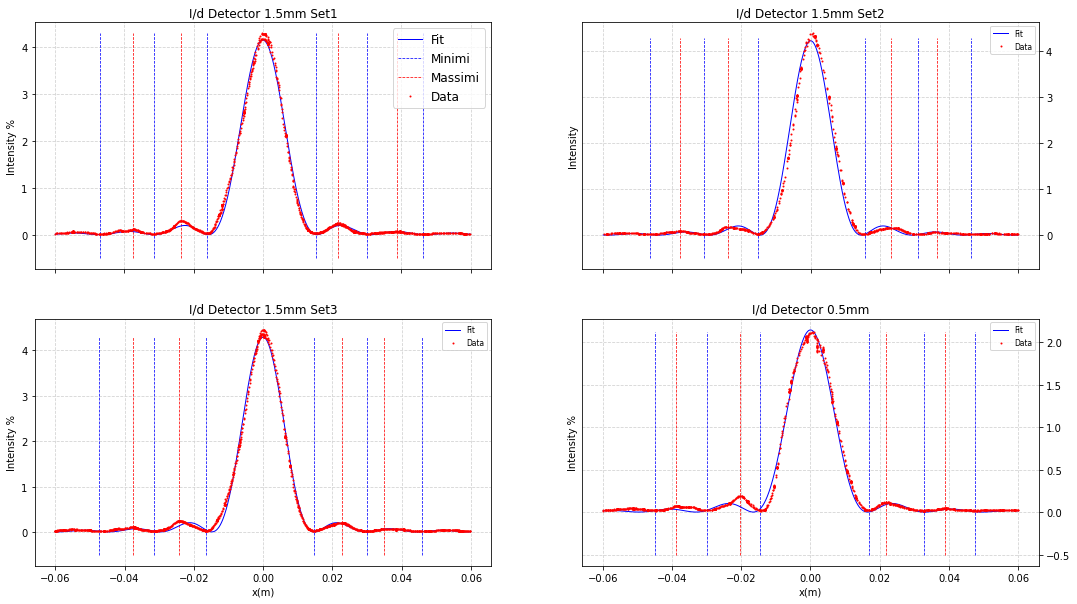

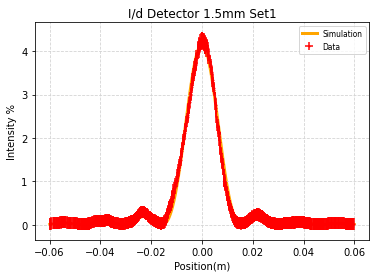

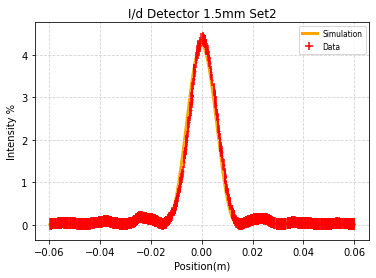

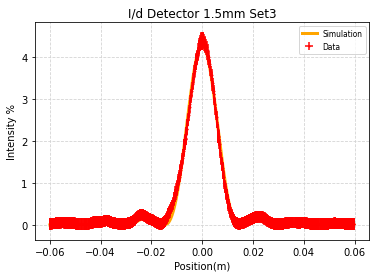

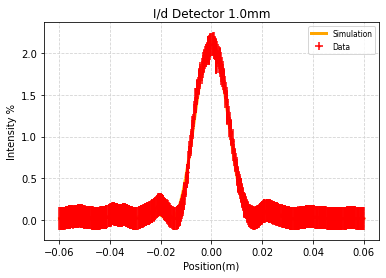

In [80]:
b = 0.04e-03

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


Table = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Antonio_0.04_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table = Table.transpose()

Table2 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessio_0.04_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table2 = Table2.transpose()

Table3 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessandra_0.04_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table3 = Table3.transpose()

Table4 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessio_0.04_1.0_lampada.txt", delimiter="\t", skiprows=1, unpack = False)
Table4 = Table4.transpose()

Idata = Table[0]-0.013578
xdata = Table[1]

Idata2 = Table2[0]-0.013578
xdata2 = Table2[1]

Idata3 = Table3[0]-0.013578
xdata3 = Table3[1]

Idata4 = Table4[0]-0.013578
xdata4 = Table4[1]

maxint = np.argmax(Idata)
xdata = (xdata-xdata[maxint])

maxint = np.argmax(Idata2)
xdata2 = (xdata2-xdata2[maxint])

maxint = np.argmax(Idata3)
xdata3 = (xdata3-xdata3[maxint])

maxint = np.argmax(Idata4)
xdata4 = (xdata4-xdata4[maxint])

#taglio a dx e sx 

xdata1 = []
Idata1 = []
for i in range(len(xdata)):
  if(np.abs(xdata[i])<0.06):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])

Idata = Idata1
xdata = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata2)):
  if(np.abs(xdata2[i])<0.06):
    xdata1.append(xdata2[i])
    Idata1.append(Idata2[i])

Idata2 = Idata1
xdata2 = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata3)):
  if(np.abs(xdata3[i])<0.06):
    xdata1.append(xdata3[i])
    Idata1.append(Idata3[i])

Idata3 = Idata1
xdata3 = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata4)):
  if(np.abs(xdata4[i])<0.06):
    xdata1.append(xdata4[i])
    Idata1.append(Idata4[i])

Idata4 = Idata1
xdata4 = xdata1

MaxIntensity = np.max(Idata)
print('maxIntens')
print(MaxIntensity)

MaxIntensity2 = np.max(Idata2)
print('maxIntens2')
print(MaxIntensity2)

MaxIntensity3 = np.max(Idata3)
print('maxIntens3')
print(MaxIntensity3)

MaxIntensity4 = np.max(Idata4)
print('maxIntens4')
print(MaxIntensity4)

xdataerr = np.ones(len(xdata))*8e-6
Idataerr = np.ones(len(xdata))*(4.59/100*3)

xdataerr2 = np.ones(len(xdata2))*8e-6
Idataerr2 = np.ones(len(xdata2))*(4.59/100*3)

xdataerr3 = np.ones(len(xdata3))*8e-6
Idataerr3 = np.ones(len(xdata3))*(4.59/100*3)

xdataerr4 = np.ones(len(xdata4))*8e-6
Idataerr4 = np.ones(len(xdata4))*(4.59/100*3)


def distanceFunctionFit(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit2(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit3(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit4(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

#simulation

#tolgo gli zeri

xdata1 = []
Idata1 = []
Idataerr1 = []
xdataerr1 = []
for i in range(len(Idata)):
  if(xdata[i] != 0):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])
    Idataerr1.append(Idataerr[i])
    xdataerr1.append(xdataerr[i])

xdata12 = []
Idata12 = []
Idataerr12 = []
xdataerr12 = []
for i in range(len(Idata2)):
  if(xdata2[i] != 0):
    xdata12.append(xdata2[i])
    Idata12.append(Idata2[i])
    Idataerr12.append(Idataerr2[i])
    xdataerr12.append(xdataerr2[i])

xdata13 = []
Idata13 = []
Idataerr13 = []
xdataerr13 = []
for i in range(len(xdata3)):
  if(xdata3[i] != 0):
    xdata13.append(xdata3[i])
    Idata13.append(Idata3[i])
    Idataerr13.append(Idataerr3[i])
    xdataerr13.append(xdataerr3[i])

xdata14 = []
Idata14 = []
Idataerr14 = []
xdataerr14 = []
for i in range(len(xdata4)):
  if(xdata4[i] != 0):
    xdata14.append(xdata4[i])
    Idata14.append(Idata4[i])
    Idataerr14.append(Idataerr4[i])
    xdataerr14.append(xdataerr4[i])







#fitting distance from measured intensity
print("b")
print(b)
#set1
guess = np.array([b,MaxIntensity])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata1, Idata1,sigma = Idataerr1,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
print("bfit")
print(bfit)
print(bfiterr)
print(0.4*10**(-5))
print('intensityfit')
print(intensity)
print(intensityerr)
print(0.16)
xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfitb,bfit,intensity)
x = np.linspace(min(xdata),max(xdata),1000)
y = distanceFunctionFit(x,bfit,intensity)
#set2
guess = np.array([b,MaxIntensity2])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit2, xdata12, Idata12,sigma = Idataerr12,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit2,intensity = popt
print("bfit2")

print(bfit2)
print(bfiterr)
print(0.5*10**(-5))
print('intensityfit2')
print(intensity)
print(intensityerr)
print(0.14)
xfitb2 = np.linspace(min(xdata), max(xdata), 1000)
yfitb2 = distanceFunctionFit2(xfitb2,bfit2,intensity)
x2 = np.linspace(min(xdata2),max(xdata2),1000)
y2 = distanceFunctionFit2(x2,bfit2,intensity)

#set3
guess = np.array([b,MaxIntensity3])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit3, xdata13, Idata13,sigma = Idataerr13,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit3,intensity = popt
print("bfit3")

print(bfit3)
print(bfiterr)
print(0.5*10**(-5))
print('intensityfit3')
print(intensity)
print(intensityerr)
print(0.15)
xfitb3 = np.linspace(min(xdata3), max(xdata3), 1000)
yfitb3 = distanceFunctionFit3(xfitb3,bfit3,intensity)
x3 = np.linspace(min(xdata3),max(xdata3),1000)
y3 = distanceFunctionFit3(x3,bfit3,intensity)



#set4
guess = np.array([b,MaxIntensity4])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit4, xdata14, Idata14,sigma = Idataerr14,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit4,intensity = popt
print("bfit4")

print(bfit4)
print(bfiterr)
print(0.5*10**(-5))
print('intensityfit4')
print(intensity)
print(intensityerr)
print(0.13)
xfitb4 = np.linspace(min(xdata4), max(xdata4), 1000)
yfitb4 = distanceFunctionFit4(xfitb4,bfit4,intensity)
x4 = np.linspace(min(xdata4),max(xdata4),1000)
y4 = distanceFunctionFit4(x4,bfit4,intensity)

print('bestbtot1234')
print(4.3*10**(-5))
print(0.4*10**(-5))
print('bestbtot123')
print(4.2*10**(-5))
print(0.3*10**(-5))
print('Intensitybest123')
print(4.23)
print(0.09)

xtot = np.linspace(min(xdata4),max(xdata4),1000)
ytot = distanceFunctionFit4(x4,4.2*10**(-5),4.23)


#graph
yint = np.linspace(-0.5,max(Idata),1000)
yint4 = np.linspace(-0.5,max(Idata4),1000)

minimumdata = findMin(3,xdata1,Idata1,bfit)
minimumdata2 = findMin(3,xdata12,Idata12,bfit2)
minimumdata3 = findMin(3,xdata13,Idata13,bfit3)
minimumdata4 = findMin(3,xdata14,Idata14,bfit4)

maximumdata = findMax(2,xdata1,Idata1,bfit)
maximumdata2 = findMax(2,xdata12,Idata12,bfit2)
maximumdata3 = findMax(2,xdata13,Idata13,bfit3)
maximumdata4 = findMax(2,xdata14,Idata14,bfit4)

fig, axs = plt.subplots(2, 2,figsize=(18,10))
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm Set1')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].legend(loc="upper right",prop={'size': 12})
print('lung_onda da minimo1')
mindiff = np.abs(xdata1[minimumdata[0]]-xdata1[minimumdata[3]])/2
print(bfit/L*mindiff)
print(((0.4*10**(-5)/bfit)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit/L*mindiff)
print('lung_onda da minimo2')
mindiff = np.abs(xdata1[minimumdata[1]]-xdata1[minimumdata[4]])/2
print(bfit/L*mindiff/2)
print(((0.4*10**(-5)/bfit)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit/L*mindiff/2)
print('lung_onda da minimo3')
mindiff = np.abs(xdata1[minimumdata[2]]-xdata1[minimumdata[5]])/2
print(bfit/L*mindiff/3)
print(((0.4*10**(-5)/bfit)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit/L*mindiff/3)


axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 1].plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm Set2')
axs[0, 1].legend(loc="upper right",prop={'size': 7.5})
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
print('set 2 lung_onda da minimo1')
mindiff = np.abs(xdata12[minimumdata2[0]]-xdata12[minimumdata2[3]])/2
print(bfit2/L*mindiff)
print(((0.5*10**(-5)/bfit2)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit2/L*mindiff)
print('set 2 lung_onda da minimo2')
mindiff = np.abs(xdata12[minimumdata2[1]]-xdata12[minimumdata2[4]])/2
print(bfit2/L*mindiff/2)
print(((0.5*10**(-5)/bfit2)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit2/L*mindiff/2)
print('set 2 lung_onda da minimo3')
mindiff = np.abs(xdata12[minimumdata2[2]]-xdata12[minimumdata2[5]])/2
print(bfit2/L*mindiff/3)
print(((0.5*10**(-5)/bfit2)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit2/L*mindiff/3)

axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 0].plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm Set3')
axs[1, 0].legend(loc="upper right",prop={'size': 7.5})
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
print('set 3 lung_onda da minimo1')
mindiff = np.abs(xdata13[minimumdata3[0]]-xdata13[minimumdata3[3]])/2
print(bfit3/L*mindiff)
print(((0.5*10**(-5)/bfit3)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit3/L*mindiff)
print('set 3 lung_onda da minimo2')
mindiff = np.abs(xdata13[minimumdata3[1]]-xdata13[minimumdata3[4]])/2
print(bfit3/L*mindiff/2)
print(((0.5*10**(-5)/bfit3)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit3/L*mindiff/2)
print('set 3 lung_onda da minimo3')
mindiff = np.abs(xdata13[minimumdata3[2]]-xdata13[minimumdata3[5]])/2
print(bfit3/L*mindiff/3)
print(((0.5*10**(-5)/bfit3)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit3/L*mindiff/3)

axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 1].plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
axs[1, 1].set_title('I/d Detector 0.5mm')
axs[1, 1].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].yaxis.tick_right()
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[0]],yint4, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[1]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[2]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[3]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[4]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[5]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[0]],yint4, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[1]],yint4, color='red', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[2]],yint4, color='red', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[3]],yint4, color='red', linewidth=0.75, linestyle='dashed')
print('set 4 lung_onda da minimo1')
mindiff = np.abs(xdata14[minimumdata4[0]]-xdata14[minimumdata4[3]])/2
print(bfit4/L*mindiff)
print(((0.5*10**(-5)/bfit4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit4/L*mindiff)
print('set 4 lung_onda da minimo2')
mindiff = np.abs(xdata14[minimumdata4[1]]-xdata14[minimumdata4[4]])/2
print(bfit4/L*mindiff/2)
print(((0.5*10**(-5)/bfit4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit4/L*mindiff/2)
print('set 4 lung_onda da minimo3')
mindiff = np.abs(xdata14[minimumdata4[2]]-xdata14[minimumdata4[5]])/2
print(bfit4/L*mindiff/3)
print(((0.5*10**(-5)/bfit4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit4/L*mindiff/3)


print('lung_onda finale per 0.04')
print(6.5*10**(-7))
print(0.4*10**(-7))

for ax in axs.flat:
    ax.set(xlabel='x(m)', ylabel='Intensity %')
axs[0, 0].label_outer()
axs[0, 1].label_outer()
axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Intensity')
plt.show()
fig.savefig(f'4Grafici_0.04.pdf',dpi = 300)






fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
#plt.plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata1,Idata1, xerr=xdataerr1,yerr=Idataerr1, label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set1')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.04_1.5_set1.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
#plt.plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata12,Idata12, xerr=xdataerr12,yerr=Idataerr12,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set2')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.04_1.5_set2.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
#plt.plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata13,Idata13, xerr=xdataerr13,yerr=Idataerr13,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set3')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.04_1.5_set3.pdf',dpi = 300)


fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
#plt.plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata14,Idata14, xerr=xdataerr14,yerr=Idataerr14,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.0mm')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.04_1.0.pdf',dpi = 300)

xdata0041 = xdata1
Idata0041 = Idata1

xdata0042 = xdata12
Idata0042 = Idata12

xdata0043 = xdata13
Idata0043 = Idata13

xdata0044 = xdata14
Idata0044 = Idata14

maxIntens
0.9492820000000001
maxIntens2
1.022832
maxIntens3
1.0459619999999998
maxIntens4
64.848252
b
2e-05
bfit
1.8038180263964592e-05
8.647900981187306e-08
bfit2
1.876610168591589e-05
8.914920473733816e-08
bfit3
1.9614563192711165e-05
9.030097439133753e-08
2.0000000000000003e-06
bfit4
1.9660761064904553e-05
1.3258946159514375e-07
b best da media e std
1.901990155187405e-05
6.694240886052295e-07
Intensity best da media e std
1.0283182614064021
0.030661700796809827
lung_onda da minimo1
5.737781158510191e-07
1.5904891513262666e-07
lung_onda da minimo2
5.812348080459963e-07
1.6111403690073234e-07
b da minimo1
2.0120034295513004e-05
3.1652097955645304e-07
b da minimo2
1.9861913307889442e-05
3.1134900283411355e-07
set 2 lung_onda da minimo1
6.034723366392103e-07
1.2863496529776627e-07
set 2 lung_onda da minimo2
5.909473854382315e-07
1.2596284196184486e-07
set 2 b da minimo1
1.868613138686131e-05
2.9377361969538235e-07
set 2 b da minimo2
2.1297300022688882e-05
3.339072443589467e-07
set 3 lu

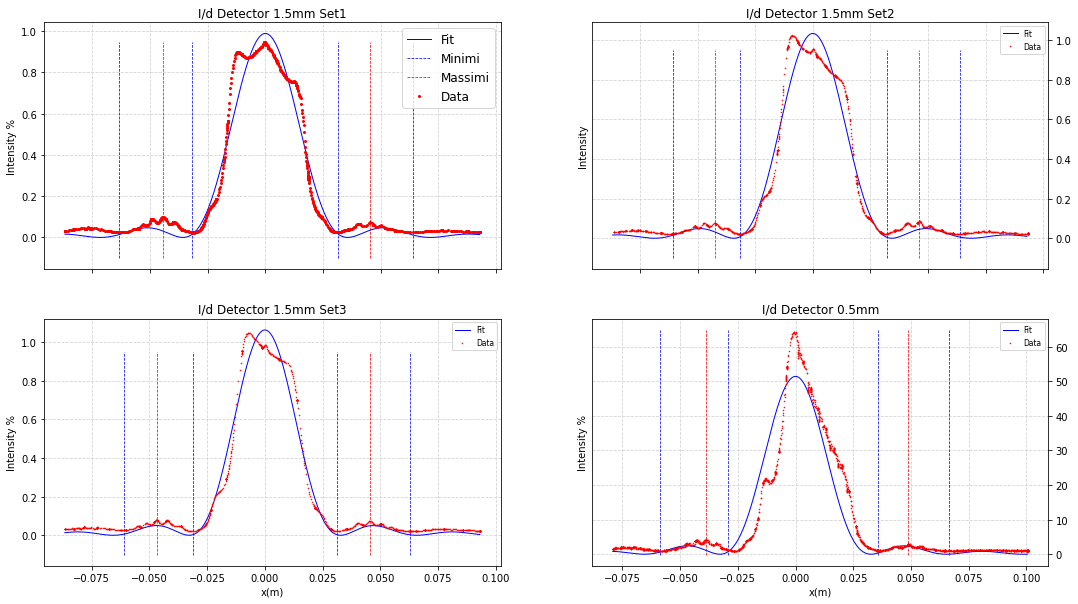

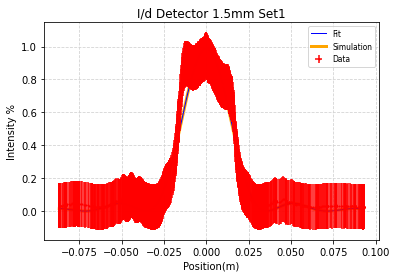

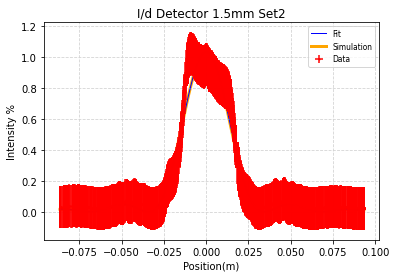

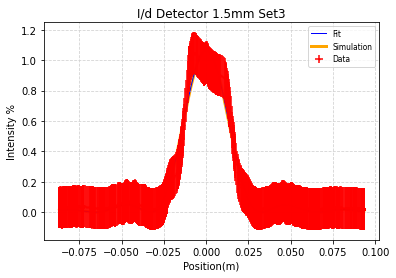

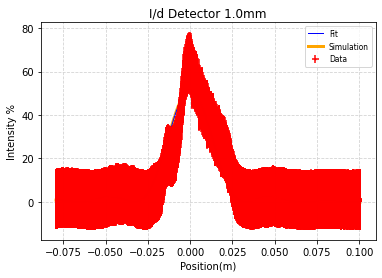

In [73]:
b = 0.02e-03

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


Table = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Antonio_0.02_1.5_lampadina_2.txt", delimiter="\t", skiprows=1, unpack = False)
Table = Table.transpose()

Table2 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessio_0.02_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table2 = Table2.transpose()

Table3 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessandra_0.02_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table3 = Table3.transpose()

Table4 = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Alessio_0.02_1.0_candela.txt", delimiter="\t", skiprows=1, unpack = False)
Table4 = Table4.transpose()

Idata = Table[0]-0.013578
xdata = Table[1]

Idata2 = Table2[0]-0.013578
xdata2 = Table2[1]

Idata3 = Table3[0]-0.013578
xdata3 = Table3[1]

Idata4 = Table4[0]-0.013578
xdata4 = Table4[1]

maxint = np.argmax(Idata)
xdata = (xdata-xdata[maxint])

maxint = np.argmax(Idata2)
xdata2 = (xdata2-xdata2[maxint])

maxint = np.argmax(Idata3)
xdata3 = (xdata3-xdata3[maxint])

maxint = np.argmax(Idata4)
xdata4 = (xdata4-xdata4[maxint])


minx = np.argmin(xdata)
xdata1 = []
Idata1 = []
for i in range(len(xdata)):
  if(i>minx):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])

Idata = Idata1
xdata = xdata1

minx = np.argmin(xdata2)
xdata1 = []
Idata1 = []
for i in range(len(xdata2)):
  if(i<minx):
    xdata1.append(xdata2[i])
    Idata1.append(Idata2[i])

Idata2 = Idata1
xdata2 = xdata1

minx = np.argmin(xdata3)
xdata1 = []
Idata1 = []
for i in range(len(xdata3)):
  if(i<minx):
    xdata1.append(xdata3[i])
    Idata1.append(Idata3[i])

Idata3 = Idata1
xdata3 = xdata1

MaxIntensity = np.max(Idata)
print('maxIntens')
print(MaxIntensity)

MaxIntensity2 = np.max(Idata2)
print('maxIntens2')
print(MaxIntensity2)

MaxIntensity3 = np.max(Idata3)
print('maxIntens3')
print(MaxIntensity3)

MaxIntensity4 = np.max(Idata4)
print('maxIntens4')
print(MaxIntensity4)

xdataerr = np.ones(len(xdata))*8e-6
Idataerr = np.ones(len(xdata))*(4.59/100*3)

xdataerr2 = np.ones(len(xdata2))*8e-6
Idataerr2 = np.ones(len(xdata2))*(4.59/100*3)

xdataerr3 = np.ones(len(xdata3))*8e-6
Idataerr3 = np.ones(len(xdata3))*(4.59/100*3)

xdataerr4 = np.ones(len(xdata4))*8e-6
Idataerr4 = np.ones(len(xdata4))*(4.59*3)


def distanceFunctionFit(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit2(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit3(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit4(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

#simulation

#tolgo gli zeri

xdata1 = []
Idata1 = []
Idataerr1 = []
xdataerr1 = []
for i in range(len(Idata)):
  if(xdata[i] != 0):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])
    Idataerr1.append(Idataerr[i])
    xdataerr1.append(xdataerr[i])

xdata12 = []
Idata12 = []
Idataerr12 = []
xdataerr12 = []
for i in range(len(Idata2)):
  if(xdata2[i] != 0):
    xdata12.append(xdata2[i])
    Idata12.append(Idata2[i])
    Idataerr12.append(Idataerr2[i])
    xdataerr12.append(xdataerr2[i])

xdata13 = []
Idata13 = []
Idataerr13 = []
xdataerr13 = []
for i in range(len(xdata3)):
  if(xdata3[i] != 0):
    xdata13.append(xdata3[i])
    Idata13.append(Idata3[i])
    Idataerr13.append(Idataerr3[i])
    xdataerr13.append(xdataerr3[i])

xdata14 = []
Idata14 = []
Idataerr14 = []
xdataerr14 = []
for i in range(len(xdata4)):
  if(xdata4[i] != 0):
    xdata14.append(xdata4[i])
    Idata14.append(Idata4[i])
    Idataerr14.append(Idataerr4[i])
    xdataerr14.append(xdataerr4[i])



#fitting distance from measured intensity
print("b")
print(b)
#set1
guess = np.array([b,MaxIntensity])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata1, Idata1,sigma = Idataerr1,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
intensity1 = intensity
print("bfit")
print(bfit)
print(bfiterr)

xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfitb,bfit,intensity)
x = np.linspace(min(xdata),max(xdata),1000)
y = distanceFunctionFit(x,bfit,intensity)
#set2
guess = np.array([b,MaxIntensity2])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit2, xdata12, Idata12,sigma = Idataerr12,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit2,intensity = popt
print("bfit2")
intensity2 = intensity
print(bfit2)
print(bfiterr)
xfitb2 = np.linspace(min(xdata), max(xdata), 1000)
yfitb2 = distanceFunctionFit2(xfitb2,bfit2,intensity)
x2 = np.linspace(min(xdata2),max(xdata2),1000)
y2 = distanceFunctionFit2(x2,bfit2,intensity)

#set3
guess = np.array([b,MaxIntensity3])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit3, xdata13, Idata13,sigma = Idataerr13,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit3,intensity = popt
print("bfit3")
intensity3 = intensity
print(bfit3)
print(bfiterr)
print(0.2*10**(-5))
xfitb3 = np.linspace(min(xdata3), max(xdata3), 1000)
yfitb3 = distanceFunctionFit3(xfitb3,bfit3,intensity)
x3 = np.linspace(min(xdata3),max(xdata3),1000)
y3 = distanceFunctionFit3(x3,bfit3,intensity)


#set4
guess = np.array([b,MaxIntensity4])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit4, xdata14, Idata14,sigma = Idataerr14,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit4,intensity = popt
print("bfit4")
intensity4 = intensity
print(bfit4)
print(bfiterr)
xfitb4 = np.linspace(min(xdata4), max(xdata4), 1000)
yfitb4 = distanceFunctionFit4(xfitb4,bfit4,intensity)
x4 = np.linspace(min(xdata4),max(xdata4),1000)
y4 = distanceFunctionFit4(x4,bfit4,intensity)

print('b best da media e std')
print(np.mean(np.array([bfit,bfit2,bfit3,bfit4])))
print(np.std(np.array([bfit,bfit2,bfit3,bfit4])))
print('Intensity best da media e std')
print(np.mean(np.array([intensity1,intensity2,intensity3])))
print(np.std(np.array([intensity1,intensity2,intensity3])))

#graph
yint = np.linspace(-0.1,max(Idata),1000)
yint4 = np.linspace(-0.1,max(Idata4),1000)

minimumdata = findMin(2,xdata1,Idata1,bfit)
minimumdata2 = findMin(2,xdata12,Idata12,bfit2)
minimumdata3 = findMin(2,xdata13,Idata13,bfit3)
minimumdata4 = findMin(2,xdata14,Idata14,bfit4)

maximumdata = findMax(1,xdata1,Idata1,bfit)
maximumdata2 = findMax(1,xdata12,Idata12,bfit2)
maximumdata3 = findMax(1,xdata13,Idata13,bfit3)
maximumdata4 = findMax(1,xdata14,Idata14,bfit4)

fig, axs = plt.subplots(2, 2,figsize=(18,10))
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm Set1')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].legend(loc="upper right",prop={'size': 12})
print('lung_onda da minimo1')
mindiff = np.abs(xdata1[minimumdata[0]]-xdata1[minimumdata[2]])/2
lung11 = bfit/L*mindiff
print(bfit/L*mindiff)
print(((0.5*10**(-5)/bfit)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit/L*mindiff)
print('lung_onda da minimo2')
mindiff = np.abs(xdata1[minimumdata[1]]-xdata1[minimumdata[3]])/2
lung12 = bfit/L*mindiff/2
print(bfit/L*mindiff/2)
print(((0.5*10**(-5)/bfit)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit/L*mindiff/2)

print('b da minimo1')
mindiff = np.abs(xdata1[minimumdata[0]]-xdata1[minimumdata[2]])/2
b11 = 6.4*10**(-7)*L/mindiff
print(6.4*10**(-7)*L/mindiff)
print(((0.1/6.4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*6.4*10**(-7)*L/mindiff)
print('b da minimo2')
mindiff = np.abs(xdata1[minimumdata[1]]-xdata1[minimumdata[3]])/2
b12 = 6.4*10**(-7)*L/mindiff*2
print(6.4*10**(-7)*L/mindiff*2)
print(((0.1/6.4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*6.4*10**(-7)*L/mindiff*2)


axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 1].plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm Set2')
axs[0, 1].legend(loc="upper right",prop={'size': 7.5})
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[minimumdata2[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[0, 1].plot(np.ones(len(yint))*xdata12[maximumdata2[1]],yint, color='red', linewidth=0.75, linestyle='dashed')

print('set 2 lung_onda da minimo1')
mindiff = np.abs(xdata12[minimumdata2[0]]-xdata12[minimumdata2[2]])/2
lung21 = bfit2/L*mindiff
print(bfit2/L*mindiff)
print(((0.4*10**(-5)/bfit2)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit2/L*mindiff)
print('set 2 lung_onda da minimo2')
mindiff = np.abs(xdata12[minimumdata2[1]]-xdata12[minimumdata2[3]])/2
lung22 = bfit2/L*mindiff/2
print(bfit2/L*mindiff/2)
print(((0.4*10**(-5)/bfit2)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit2/L*mindiff/2)

print('set 2 b da minimo1')
mindiff = np.abs(xdata12[minimumdata[0]]-xdata12[minimumdata[2]])/2
b21 = 6.4*10**(-7)*L/mindiff
print(6.4*10**(-7)*L/mindiff)
print(((0.1/6.4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*6.4*10**(-7)*L/mindiff)
print('set 2 b da minimo2')
mindiff = np.abs(xdata12[minimumdata[1]]-xdata12[minimumdata[3]])/2
b22 = 6.4*10**(-7)*L/mindiff*2
print(6.4*10**(-7)*L/mindiff*2)
print(((0.1/6.4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*6.4*10**(-7)*L/mindiff*2)

axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 0].plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm Set3')
axs[1, 0].legend(loc="upper right",prop={'size': 7.5})
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[minimumdata3[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[1, 0].plot(np.ones(len(yint))*xdata13[maximumdata3[1]],yint, color='red', linewidth=0.75, linestyle='dashed')

print('set 3 lung_onda da minimo1')
mindiff = np.abs(xdata13[minimumdata3[0]]-xdata13[minimumdata3[2]])/2
lung31 = bfit3/L*mindiff
print(bfit3/L*mindiff)
print(((0.7*10**(-5)/bfit3)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit3/L*mindiff)
print('set 3 lung_onda da minimo2')
mindiff = np.abs(xdata13[minimumdata3[1]]-xdata13[minimumdata3[3]])/2
lung32 = bfit3/L*mindiff/2
print(bfit3/L*mindiff/2)
print(((0.7*10**(-5)/bfit3)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit3/L*mindiff/2)
print('set 3 b da minimo1')
mindiff = np.abs(xdata13[minimumdata[0]]-xdata13[minimumdata[2]])/2
b31 = 6.4*10**(-7)*L/mindiff
print(6.4*10**(-7)*L/mindiff)
print(((0.1/6.4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*6.4*10**(-7)*L/mindiff)
print('set 3 b da minimo2')
mindiff = np.abs(xdata13[minimumdata[1]]-xdata13[minimumdata[3]])/2
b32 = 6.4*10**(-7)*L/mindiff*2
print(6.4*10**(-7)*L/mindiff*2)
print(((0.1/6.4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*6.4*10**(-7)*L/mindiff*2)

axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 1].plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
axs[1, 1].set_title('I/d Detector 0.5mm')
axs[1, 1].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].yaxis.tick_right()
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[0]],yint4, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[1]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[2]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[minimumdata4[3]],yint4, color='blue', linewidth=0.75, linestyle='dashed')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[0]],yint4, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
axs[1, 1].plot(np.ones(len(yint4))*xdata14[maximumdata4[1]],yint4, color='red', linewidth=0.75, linestyle='dashed')

print('set 4 lung_onda da minimo1')
mindiff = np.abs(xdata14[minimumdata4[0]]-xdata14[minimumdata4[2]])/2
lung41 = bfit4/L*mindiff
print(bfit4/L*mindiff)
print(((1*10**(-5)/bfit4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit4/L*mindiff)
print('set 4 lung_onda da minimo2')
mindiff = np.abs(xdata14[minimumdata4[1]]-xdata14[minimumdata4[3]])/2
lung42 = bfit4/L*mindiff/2
print(bfit4/L*mindiff/2)
print(((1*10**(-5)/bfit4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*bfit4/L*mindiff/2)
print('set 4 b da minimo1')
mindiff = np.abs(xdata14[minimumdata[0]]-xdata14[minimumdata[2]])/2
b41 = 6.4*10**(-7)*L/mindiff
print(6.4*10**(-7)*L/mindiff)
print(((0.1/6.4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*6.4*10**(-7)*L/mindiff)
print('set 4 b da minimo2')
mindiff = np.abs(xdata14[minimumdata[1]]-xdata14[minimumdata[3]])/2
b42 = 6.4*10**(-7)*L/mindiff*2
print(6.4*10**(-7)*L/mindiff*2)
print(((0.1/6.4)**2+(0.001/L)**2+(((6*8e-6)/mindiff)**2))**(1/2)*6.4*10**(-7)*L/mindiff*2)


print('lung_onda finale per 0.02')
print(np.mean(np.array([lung11,lung12,lung21,lung22,lung31,lung32,lung41,lung42])))
print(np.std(np.array([lung11,lung12,lung21,lung22,lung31,lung32,lung41,lung42])))
print('b finale per 0.02')
print(np.mean(np.array([b11,b12,b21,b22,b31,b32,b41,b42])))
print(np.std(np.array([b11,b12,b21,b22,b31,b32,b41,b42])))

for ax in axs.flat:
    ax.set(xlabel='x(m)', ylabel='Intensity %')
axs[0, 0].label_outer()
axs[0, 1].label_outer()
axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Intensity')
plt.show()
fig.savefig(f'4Grafici_0.02.pdf',dpi = 300)





fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata1,Idata1, xerr=xdataerr1,yerr=Idataerr1,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set1')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.02_1.5_set1.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata12,Idata12, xerr=xdataerr12,yerr=Idataerr12,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set2')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.02_1.5_set2.pdf',dpi = 300)

fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata13,Idata13, xerr=xdataerr13,yerr=Idataerr13,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.5mm Set3')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.02_1.5_set3.pdf',dpi = 300)


fig = plt.figure()
ax = fig.gca()
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
plt.plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.errorbar(xdata14,Idata14, xerr=xdataerr14,yerr=Idataerr14,label="Data", color = "red", fmt='o', markersize=1, zorder=4)
plt.xlabel('Position(m)')
plt.ylabel('Intensity %')
ax.set_title('I/d Detector 1.0mm')
plt.legend(loc="upper right",prop={'size': 7.5})

plt.show()
fig.savefig(f'Grafico_0.02_1.0.pdf',dpi = 300)

xdata0021 = xdata1
Idata0021 = Idata1

xdata0022 = xdata12
Idata0022 = Idata12

xdata0023 = xdata13
Idata0023 = Idata13

xdata0024 = xdata14
Idata0024 = Idata14

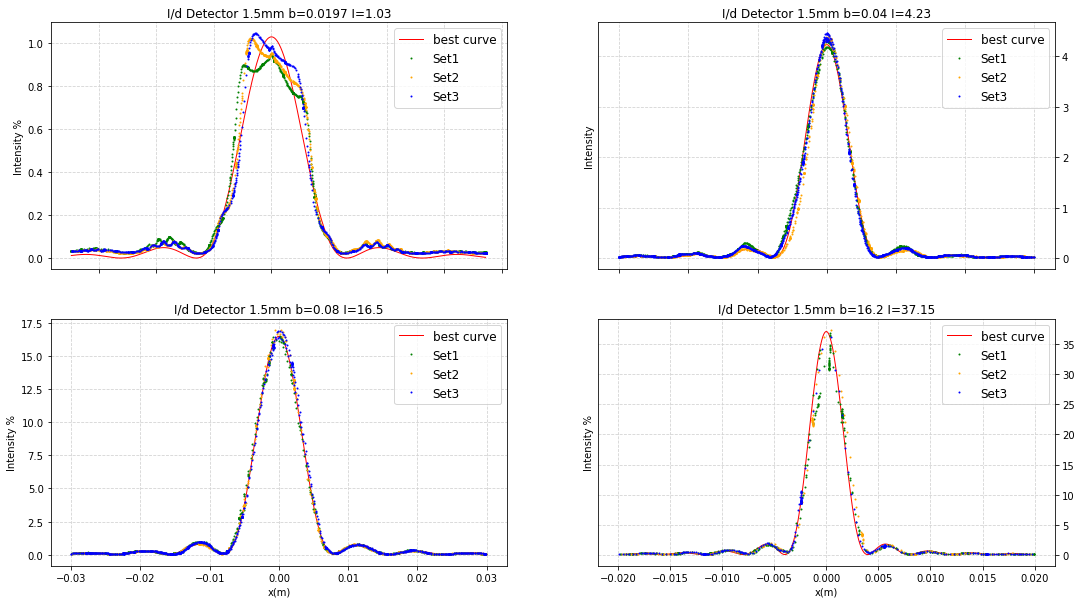

In [78]:
def distanceFunctionFit(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

x1 = np.linspace(np.min(xdata0021),np.max(xdata0021),1000)
y1 = distanceFunctionFit(x1,1.97*10**(-5),1.03)
x2 = np.linspace(np.min(xdata0041),np.max(xdata0041),1000)
y2 = distanceFunctionFit(x2,4.2*10**(-5),4.23)
x3 = np.linspace(np.min(xdata0081),np.max(xdata0081),1000)
y3 = distanceFunctionFit(x3,8*10**(-5),16.5)
x4 = np.linspace(np.min(xdata0161),np.max(xdata0161),1000)
y4 = distanceFunctionFit(x4,16.2*10**(-5),37.15)

fig, axs = plt.subplots(2, 2,figsize=(18,10))
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].plot(x1, y1, linewidth=1, zorder=3, color="red", label='best curve')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata0021,Idata0021,label="Set1", color = "green", fmt='o', markersize=1, zorder=4)
axs[0, 0].errorbar(xdata0022,Idata0022,label="Set2", color = "orange", fmt='o', markersize=1, zorder=4)
axs[0, 0].errorbar(xdata0023,Idata0023,label="Set3", color = "blue", fmt='o', markersize=1, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm b=0.0197 I=1.03')
axs[0, 0].legend(loc="upper right",prop={'size': 12})

axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 1].plot(x2, y2, linewidth=1, zorder=3, color="red", label='best curve')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata0041,Idata0041,label="Set1", color = "green", fmt='o', markersize=1, zorder=4)
axs[0, 1].errorbar(xdata0042,Idata0042,label="Set2", color = "orange", fmt='o', markersize=1, zorder=4)
axs[0, 1].errorbar(xdata0043,Idata0043,label="Set3", color = "blue", fmt='o', markersize=1, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm b=0.04 I=4.23')
axs[0, 1].legend(loc="upper right",prop={'size': 12})


axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 0].plot(x3, y3, linewidth=1, zorder=3, color="red", label='best curve')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata0081,Idata0081,label="Set1", color = "green", fmt='o', markersize=1, zorder=4)
axs[1, 0].errorbar(xdata0082,Idata0082,label="Set2", color = "orange", fmt='o', markersize=1, zorder=4)
axs[1, 0].errorbar(xdata0083,Idata0083,label="Set3", color = "blue", fmt='o', markersize=1, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm b=0.08 I=16.5')
axs[1, 0].legend(loc="upper right",prop={'size': 12})


axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 1].plot(x4, y4, linewidth=1, zorder=3, color="red", label='best curve')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata0161,Idata0161,label="Set1", color = "green", fmt='o', markersize=1, zorder=4)
axs[1, 1].errorbar(xdata0162,Idata0162,label="Set2", color = "orange", fmt='o', markersize=1, zorder=4)
axs[1, 1].errorbar(xdata0163,Idata0163,label="Set3", color = "blue", fmt='o', markersize=1, zorder=4)
axs[1, 1].set_title('I/d Detector 1.5mm b=16.2 I=37.15')
axs[1, 1].legend(loc="upper right",prop={'size': 12})
axs[1, 1].yaxis.tick_right()


for ax in axs.flat:
    ax.set(xlabel='x(m)', ylabel='Intensity %')
axs[0, 0].label_outer()
axs[0, 1].label_outer()
axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Intensity')
plt.show()
fig.savefig(f'4Grafici_finali.pdf',dpi = 300)